In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

In [43]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Dany/.keras/datasets/flower_photos')

In [3]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
import matplotlib.pyplot as plt
from glob import glob

In [46]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


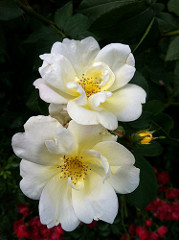

In [5]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

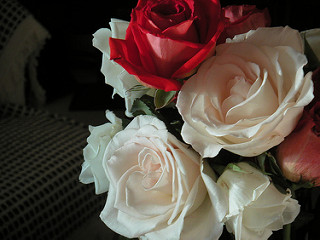

In [6]:
PIL.Image.open(str(roses[1]))

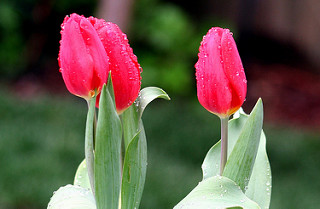

In [7]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [11]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
for fname in os.listdir('C:/Users/Dany/.keras/datasets/flower_photos/tulips'):
  print(fname)

100930342_92e8746431_n.jpg
10094729603_eeca3f2cb6.jpg
10094731133_94a942463c.jpg
10128546863_8de70c610d.jpg
10163955604_ae0b830975_n.jpg
10164073235_f29931d91e.jpg
10686568196_b1915544a8.jpg
107693873_86021ac4ea_n.jpg
10791227_7168491604.jpg
10995953955_089572caf0.jpg
110147301_ad921e2828.jpg
112334842_3ecf7585dd.jpg
112428665_d8f3632f36_n.jpg
112428919_f0c5ad7d9d_n.jpg
112650879_82adc2cc04_n.jpg
112651128_7b5d39a346_m.jpg
112951022_4892b1348b_n.jpg
112951086_150a59d499_n.jpg
113291410_1bdc718ed8_n.jpg
113902743_8f537f769b_n.jpg
113960470_38fab8f2fb_m.jpg
11441893003_ab83672800.jpg
11614202956_1dcf1c96a1.jpg
116343334_9cb4acdc57_n.jpg
11746080_963537acdc.jpg
11746276_de3dec8201.jpg
11746367_d23a35b085_n.jpg
11746452_5bc1749a36.jpg
11746548_26b3256922_n.jpg
12024561754_ce9667e4dc_n.jpg
12025038686_7f10811d4b_n.jpg
12025042086_78bafc0eb6_n.jpg
12163418275_bd6a1edd61.jpg
122450705_9885fff3c4_n.jpg
12517756805_56b74be742.jpg
12548574923_5e90f4ceea.jpg
12557176134_ecbf15885b.jpg
12584810723

In [12]:
image_1 = load_img('C:/Users/Dany/.keras/datasets/flower_photos/tulips/112334842_3ecf7585dd.jpg')

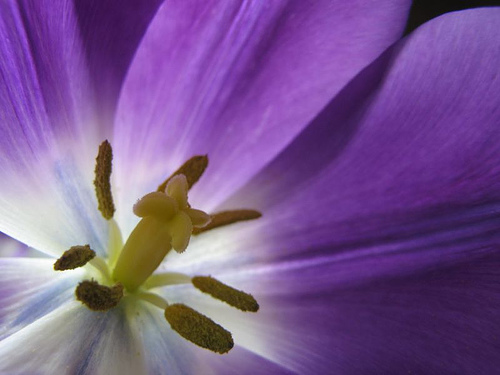

In [13]:
image_1

In [14]:
batch_size = 64
epochs = 5
IMG_HIEGHT = 224
IMG_WIDHT = 224

In [15]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5,
                                    validation_split=0.2)

In [17]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    subset='training')

Found 2939 images belonging to 5 classes.


In [18]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [19]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=data_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                subset='validation')

Found 731 images belonging to 5 classes.


In [20]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

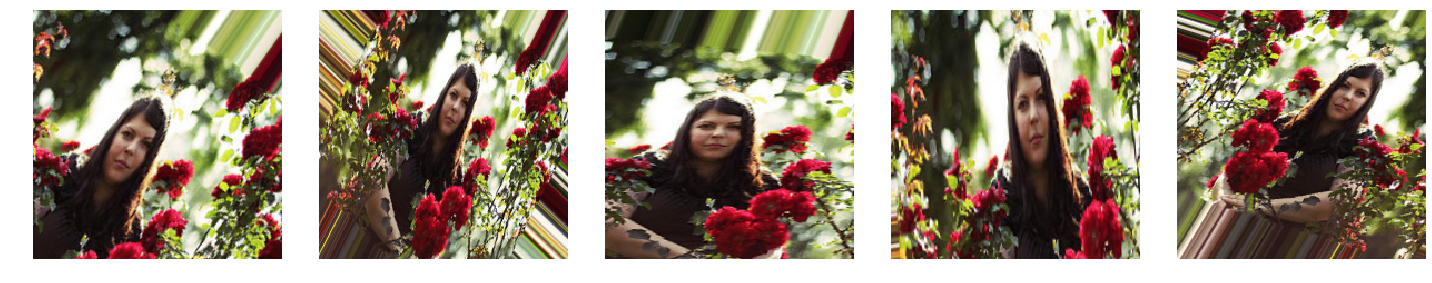

In [22]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [26]:
train_data_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [27]:
sample_train_images, label =next(train_data_gen)

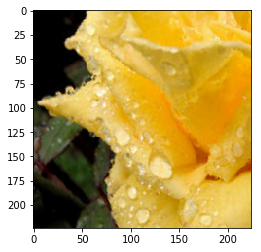

In [28]:
plt.imshow(sample_train_images[3])

In [29]:
label[3]

array([0., 0., 1., 0., 0.], dtype=float32)

In [30]:
IMAGE_SIZE = [224,224]

In [31]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)

In [32]:
for layer in vgg.layers:
    layer.trainable = False

In [33]:
x = Flatten()(vgg.output)

In [34]:
prediction = Dense(5,activation='softmax')(x)

In [35]:
model = Model(inputs=vgg.input,outputs=prediction)

In [36]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [37]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
len(train_data_gen)

46

In [42]:
history = model.fit(train_data_gen,validation_data=val_data_gen,epochs=1,verbose=1)

 1/46 [..............................] - ETA: 2:24:04 - loss: 1.6953 - accuracy: 0.4219

KeyboardInterrupt: 